In [1]:
from enquire.vendetta import Ophelia

In [2]:
ophelia = Ophelia()


-Ophelia: ¡Hullo! My Name Is Ophelia, I Am Pleased To Meet You     [...]
-Ophelia: I Am An Artificial Assistant For Intelligent Investment  [...]
-Ophelia: Welcome To Your Asset Allocation System                  [...]


-Ophelia: V For VenData                                            [...]

                    - By. Vendetta Gentleman Club -                     

                         - Author. @LuisFalva -                         

      █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █
      █ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ █
      █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █
      █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █
      █ ╬ ╬ ╬ █ █ █ █ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ █ █ █ █ ╬ ╬ ╬ █
      █ ╬ ╬ █ █ ╬ ╬ ╬ ╬ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ ╬ ╬ ╬ ╬ █ █ ╬ ╬ █
      █ ╬ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ ╬ ╬ ╬ ╬ ╬ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ ╬ █
      █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █
      █ ╬ ╬ 

In [3]:
spark = ophelia.spark
customer_banking = ophelia.mazterize.read_file("data-resources/customer_banking/", "csv", spark)

-Ophelia[INFO]: Reading Spark File [...]
-Ophelia[INFO]: Read CSV Successfully From Path: data-resources/customer_banking/ [...]


In [4]:
customer_banking.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

In [118]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoderEstimator

In [23]:
df = customer_banking.select('age', 'job', 'marital', 
                             'education', 'default', 
                             'balance', 'housing', 
                             'loan', 'contact', 
                             'duration', 'campaign', 
                             'pdays', 'previous', 
                             'poutcome', 'deposit')
cols = df.columns
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [119]:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []

In [141]:
indexers = [StringIndexer(inputCol=column, outputCol="{0}_index".format(column)) for column in categoricalColumns]
pipeline = Pipeline(stages=indexers)
string_index_df = pipeline.fit(df).transform(df)

string_index_df.limit(10).toPandas()

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,poutcome,deposit,job_index,marital_index,education_index,default_index,housing_index,loan_index,contact_index,poutcome_index
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,...,unknown,yes,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,...,unknown,yes,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,...,unknown,yes,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,55,services,married,secondary,no,2476,yes,no,unknown,579,...,unknown,yes,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,...,unknown,yes,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,42,management,single,tertiary,no,0,yes,yes,unknown,562,...,unknown,yes,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
6,56,management,married,tertiary,no,830,yes,yes,unknown,1201,...,unknown,yes,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
7,60,retired,divorced,secondary,no,545,yes,no,unknown,1030,...,unknown,yes,5.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0
8,37,technician,married,secondary,no,1,yes,no,unknown,608,...,unknown,yes,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,28,services,single,secondary,no,5090,yes,no,unknown,1297,...,unknown,yes,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [148]:
encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

In [151]:
encode_vector = encoder.fit(string_index_df)
encode_vector_df = encode_vector.transform(string_index_df)

In [153]:
encode_vector_df.limit(5).toPandas()

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,contact_index,poutcome_index,contact_index_encoded,poutcome_index_encoded,marital_index_encoded,loan_index_encoded,default_index_encoded,housing_index_encoded,education_index_encoded,job_index_encoded
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,...,1.0,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,...,1.0,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(1.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,...,1.0,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,55,services,married,secondary,no,2476,yes,no,unknown,579,...,1.0,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,...,1.0,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(1.0),"(0.0, 1.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [154]:
labeling_deposit = StringIndexer(inputCol = 'deposit', outputCol = 'label')

In [155]:
labeling_string = labeling_deposit.fit(encode_vector_df)
label_df = labeling_string.transform(encode_vector_df)

In [157]:
label_df.limit(5).toPandas()

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,poutcome_index,contact_index_encoded,poutcome_index_encoded,marital_index_encoded,loan_index_encoded,default_index_encoded,housing_index_encoded,education_index_encoded,job_index_encoded,label
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,...,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,...,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(1.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,...,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
3,55,services,married,secondary,no,2476,yes,no,unknown,579,...,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,...,0.0,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(1.0),"(0.0, 1.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0


In [171]:
string_indexer_cols = []
for c in range(len(indexers)):
    string_indexer_cols.append(indexers[c].getOutputCol())

In [173]:
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = string_indexer_cols + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

In [178]:
assemble_model = assembler.transform(label_df)
assemble_model.limit(3).toPandas()

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,contact_index_encoded,poutcome_index_encoded,marital_index_encoded,loan_index_encoded,default_index_encoded,housing_index_encoded,education_index_encoded,job_index_encoded,label,features
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,...,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 59.0,..."
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,...,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(1.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 56.0,..."
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,...,"(0.0, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.0)",(1.0),(1.0),(0.0),"(1.0, 0.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 41.0,..."


In [183]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(customer_banking)
customer_banking = pipelineModel.transform(customer_banking)
selectedCols = ['label', 'features'] + cols
customer_banking = customer_banking.select(selectedCols)
customer_banking.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [184]:
customer_banking.show()

+-----+--------------------+---+-----------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
|label|            features|age|        job| marital|education|default|balance|housing|loan|contact|duration|campaign|pdays|previous|poutcome|deposit|
+-----+--------------------+---+-----------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
|  1.0|(30,[3,11,13,16,1...| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|    1042|       1|   -1|       0| unknown|    yes|
|  1.0|(30,[3,11,13,16,1...| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|    1467|       1|   -1|       0| unknown|    yes|
|  1.0|(30,[2,11,13,16,1...| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|    1389|       1|   -1|       0| unknown|    yes|
|  1.0|(30,[4,11,13,16,1...| 55|   services| married|secondary|     no|   2476|    yes|  no|un

In [185]:
train, test = customer_banking.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7764
Test Dataset Count: 3398


## Logistic Regression Model

In [186]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [ ]:
def plot_summary(model):
    beta = np.sort(lrModel.coefficients)
    plt.plot(beta)
    plt.ylabel('Beta Coefficients')
    plt.show()

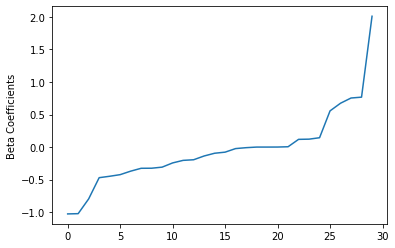

In [193]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

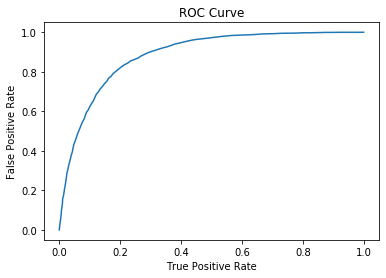

Training set areaUnderROC: 0.8849092421146739


In [197]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

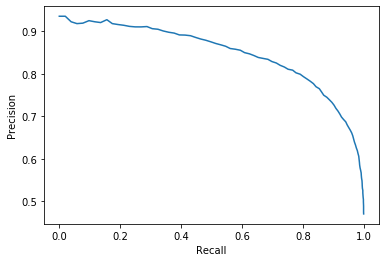

In [198]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(1000)

In [201]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8858324614449619


## Decision Tree Classifier

In [202]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 37|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 40|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 53|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 32|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 54|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 40|management|  0.0|  [373.0,30.0]|       0.0|[0.92555831265508...|
| 56|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 50|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 47|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 44|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

In [203]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7807240050065357


## Random Forest Classifier

In [204]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[14.8334308004391...|       0.0|[0.74167154002195...|
| 40|management|  0.0|[16.7031168414533...|       0.0|[0.83515584207266...|
| 53|management|  0.0|[12.6883343038168...|       0.0|[0.63441671519084...|
| 32|management|  0.0|[15.5558390485192...|       0.0|[0.77779195242596...|
| 54|management|  0.0|[15.8386547209387...|       0.0|[0.79193273604693...|
| 40|management|  0.0|[14.7552487613006...|       0.0|[0.73776243806503...|
| 56|management|  0.0|[18.1672267887941...|       0.0|[0.90836133943970...|
| 50|management|  0.0|[5.87152084001478...|       1.0|[0.29357604200073...|
| 47|management|  0.0|[11.4103373287095...|       0.0|[0.57051686643547...|
| 44|management|  0.0|[11.8632831071246...|       0.0|[0.59316415535623...|
+---+-------

In [205]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8850781161105441


## Gradient-Boosted Tree Classifier

In [206]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[0.57808138910181...|       0.0|[0.76063477260811...|
| 40|management|  0.0|[1.37467582901950...|       0.0|[0.93987672346171...|
| 53|management|  0.0|[-0.0012929624008...|       1.0|[0.49935351915983...|
| 32|management|  0.0|[0.61900313605401...|       0.0|[0.77521678642033...|
| 54|management|  0.0|[0.98157815641818...|       0.0|[0.87687413211579...|
| 40|management|  0.0|[0.96138354833170...|       0.0|[0.87244668327834...|
| 56|management|  0.0|[1.39120025731353...|       0.0|[0.94171733839668...|
| 50|management|  0.0|[-0.6141629093446...|       1.0|[0.22647458093662...|
| 47|management|  0.0|[-0.0439971283470...|       1.0|[0.47801561939801...|
| 44|management|  0.0|[0.26452511568224...|       0.0|[0.62926156628314...|
+---+-------

In [207]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8940728473145346


In [208]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8981050997838095

In [210]:
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[0.76505706806406...|       0.0|[0.82202301307761...|
| 40|management|  0.0|[1.53678281808115...|       0.0|[0.95578908813269...|
| 53|management|  0.0|[0.01661171185711...|       0.0|[0.50830509201541...|
| 32|management|  0.0|[0.88291884298319...|       0.0|[0.85393928262787...|
| 54|management|  0.0|[1.05277632423529...|       0.0|[0.89144169657109...|
| 40|management|  0.0|[1.07764209951527...|       0.0|[0.89616153390154...|
| 56|management|  0.0|[1.59181015918850...|       0.0|[0.96021320665612...|
| 50|management|  0.0|[-0.5953443686162...|       1.0|[0.23313577829588...|
| 47|management|  0.0|[0.10827740203812...|       0.0|[0.55392811456220...|
| 44|management|  0.0|[0.45286309019098...|       0.0|[0.71212481154528...|
+---+-------